# Import libraries

In this report 

In [5]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Load clean data

## Load the data

In [6]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/JLichwa80/education/refs/heads/master/data/education_data_cleaned.csv'
)

In [7]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state  zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE     19804   
1        89320.0    19.498168       0.112412  2016-2017    DE     19709   
2        84140.0    19.554335       0.096816  2016-2017    DE     19709   
3        56500.0    17.737485       0.296960  2016-2017    DE     19958   
4        54015.0    18.245421       0.262641  2016-2017    DE     19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

<pre>
























</pre>

# Exploratory data analysis

### Examine distributions and relationships



Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

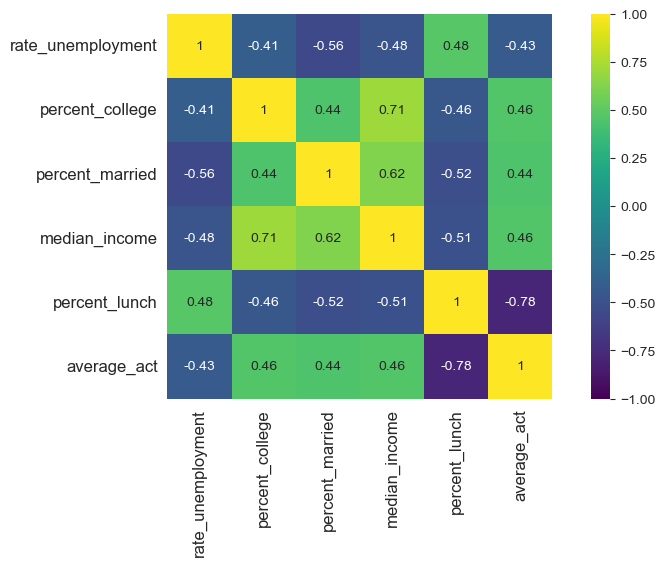

In [8]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

<pre>
























</pre>

##### Make pair plots to explore relationships between the variables

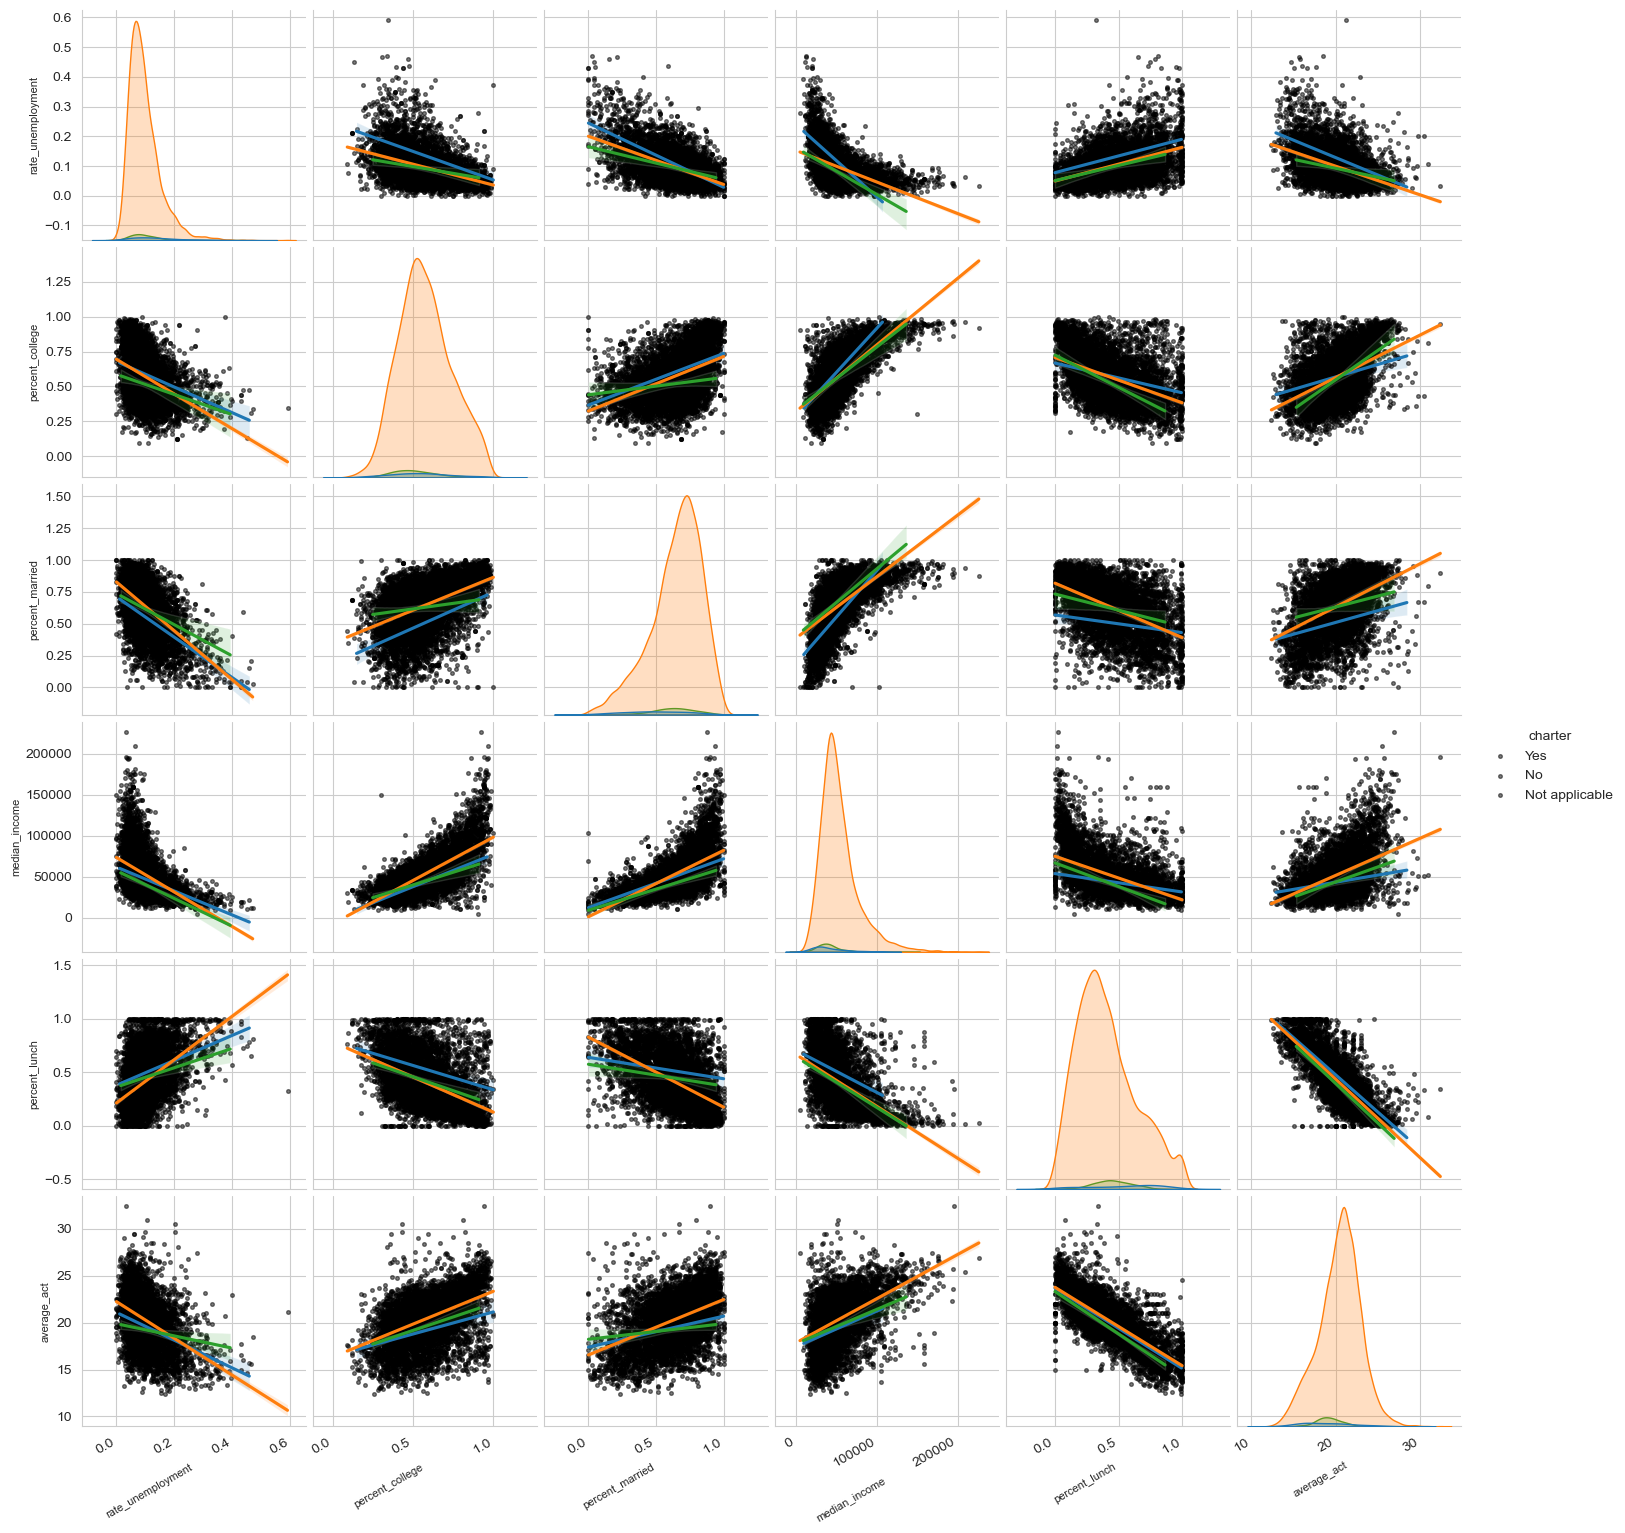

In [9]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

<pre>
























</pre>

### Identify outliers

We can use the interquartile range to identify outliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

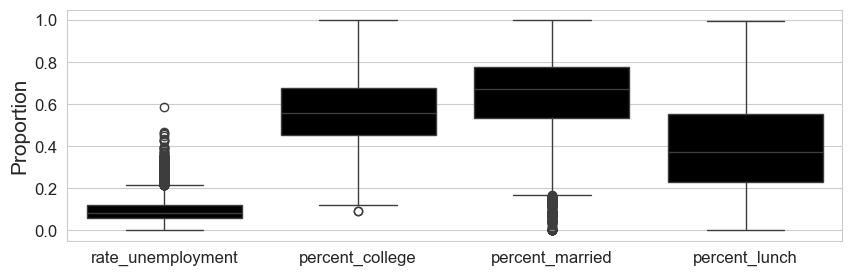

In [10]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

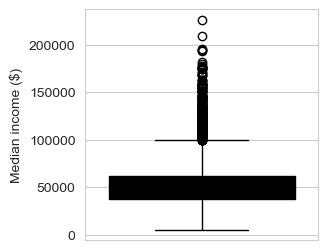

In [11]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

<pre>
























</pre>

## Summary

1.  The numerical predictors are related to `average_act`. The relationships appear roughly linear.

2.  The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.

3.  Some variables have skewed distributions, suggesting that transformations of input variables might be useful.

4. There are outliers in `rate_unemployment`, `percent_college`, `percent_married` and `median_income`. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.

5. The relationships are similar across charter and non-charter schools, but might be significantly different.

<pre>
























</pre>

# Modeling

### Single input models

Fit and assess models predicting the average ACT score from each of the input variables. You might try polynomial linear regression models, as appropriate.

#### Median income

##### Plot the regression line and the scatter plot

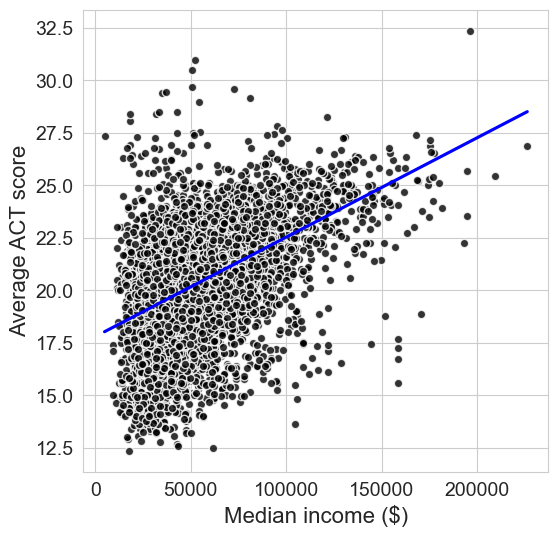

In [12]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Fit the simple linear regression model

In [13]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

<pre>
























</pre>

##### Display the fit summary: check the sign and significance of the coefficients

In [14]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1936.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:39:31   Log-Likelihood:                -16000.
No. Observations:                7211   AIC:                         3.200e+04
Df Residuals:                    7209   BIC:                         3.202e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8012      0.063    284.680

<pre>
























</pre>

##### Numerical assessment of fit accuracy

Compute the R-squared

In [15]:
model_median_income.rsquared

np.float64(0.21171593201641203)

Compute the RMSE

In [16]:
y_hat = model_median_income.predict()

In [17]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

ValueError: Found input variables with inconsistent numbers of samples: [7227, 7211]

Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688535

<pre>
























</pre>

##### Use a residual plot for graphical assessment of model fit

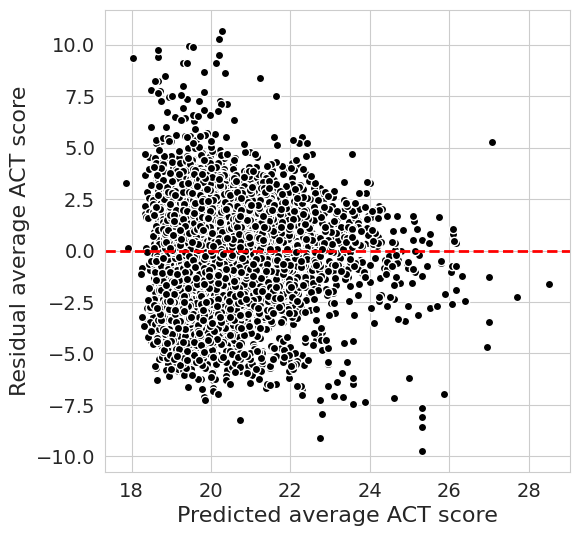

In [ ]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Try a quadratic model. Plot the regression curves and the scatter plot

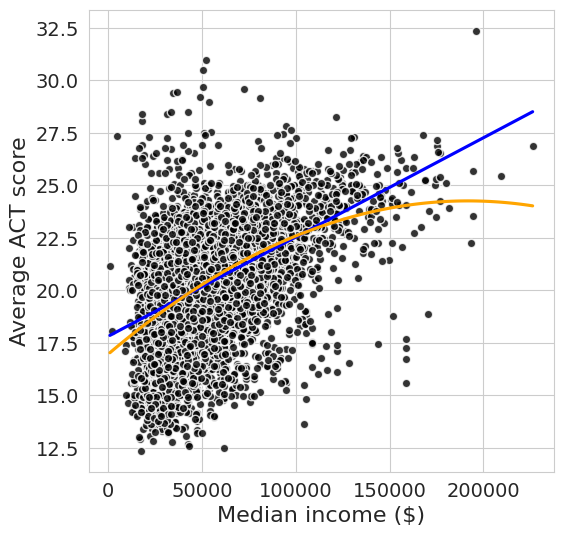

In [ ]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Fit a quadratic linear regression model

In [ ]:
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df).fit()

<pre>
























</pre>

##### Display the fit summary

In [ ]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:48   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

<pre>
























</pre>

##### Assess the model significance

In [ ]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

In [ ]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

<pre>
























</pre>

##### Assess the model accuracy

Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257619824

<pre>
























</pre>

##### Compare the quadratic model accuracy to the first order model

In [ ]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257619824

In [ ]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688535

<pre>
























</pre>

#### Unemployment rate

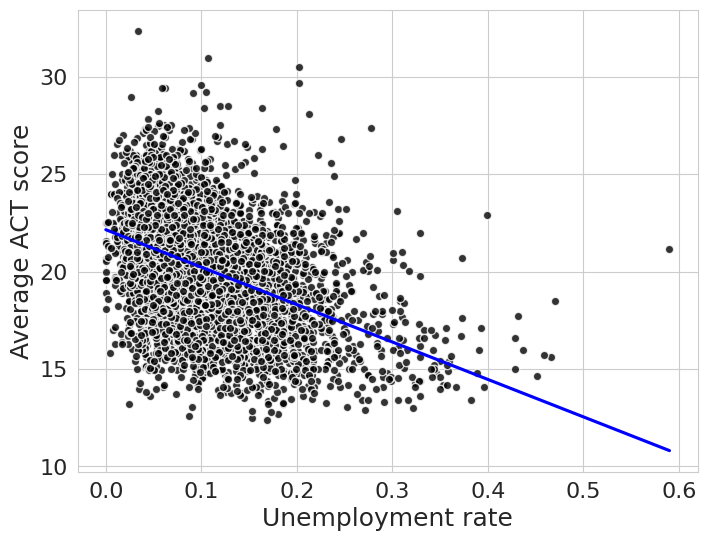

In [ ]:
plt.figure(figsize=(8, 6))

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16)

plt.show()

In [ ]:
model_ru = smf.ols(formula='average_act ~ rate_unemployment', data=df).fit()

In [ ]:
print(model_ru.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:49   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1512      0.05

The model is significant, but it is not great. The $R^2 = 0.19$, which is low.

Make a residual plot to assess the model.

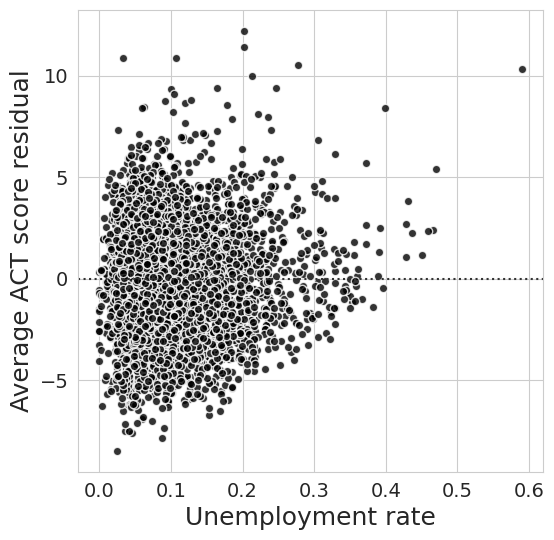

In [ ]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=df,
              x = 'rate_unemployment',
              y = 'average_act',
              scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score residual', fontsize = 18)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

Test whether a quadratic model is better.

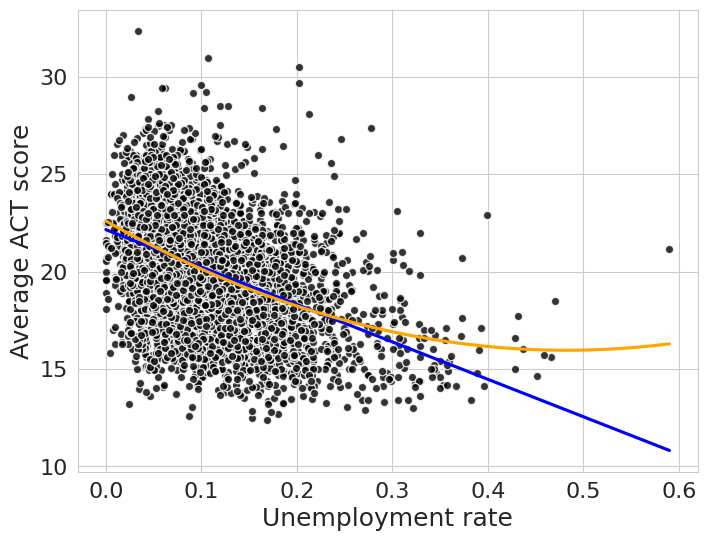

In [ ]:
plt.figure(figsize=(8,6))

sns.regplot(x='rate_unemployment',
            y='average_act',
            color='blue',
            data=df,
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(x='rate_unemployment',
            y='average_act',
            color='orange',
            order = 2,
            data=df,
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16)

plt.show()

In [ ]:
model_ru2 = smf.ols(formula='average_act ~ rate_unemployment + I(rate_unemployment**2)', data=df).fit()

In [ ]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state  zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE     19804   
1        89320.0    19.498168       0.112412  2016-2017    DE     19709   
2        84140.0    19.554335       0.096816  2016-2017    DE     19709   
3        56500.0    17.737485       0.296960  2016-2017    DE     19958   
4        54015.0    18.245421       0.262641  2016-2017    DE     19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

In [ ]:
print(model_ru2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     865.0
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:50   Log-Likelihood:                -16125.
No. Observations:                7227   AIC:                         3.226e+04
Df Residuals:                    7224   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

A quadratic model is significant, but it does not improve the fit by much.

In [ ]:
anova_lm(model_ru, model_ru2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  36932.894308      0.0         NaN        NaN           NaN
1    7224.0  36682.406013      1.0  250.488295  49.329574  2.360918e-12

**Build a single input model for one of the other predictors**

#### Percent of adults with a college degree

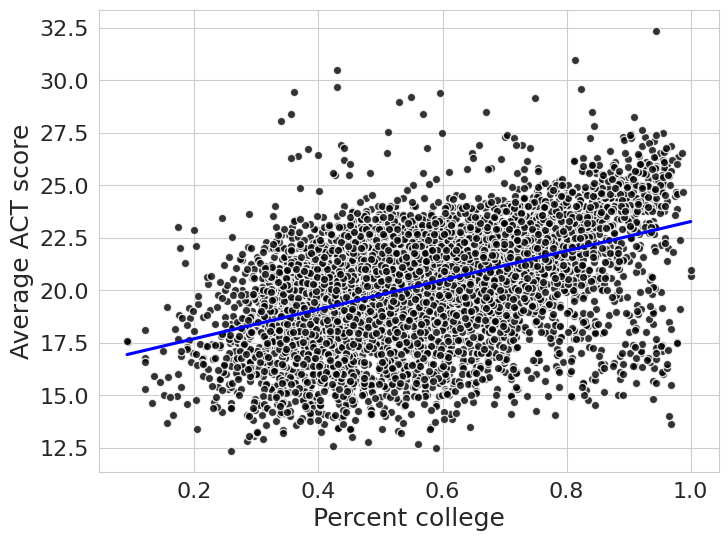

In [ ]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='percent_college',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent college', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [ ]:
model_pc = smf.ols(formula='average_act ~ percent_college', data=df).fit()

In [ ]:
print(model_pc.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1922.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:51   Log-Likelihood:                -16048.
No. Observations:                7227   AIC:                         3.210e+04
Df Residuals:                    7225   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3039      0.095    1

The model is significant, but it is not great. The $R^2 = 0.20$, which is low.

#### Percent of adults married

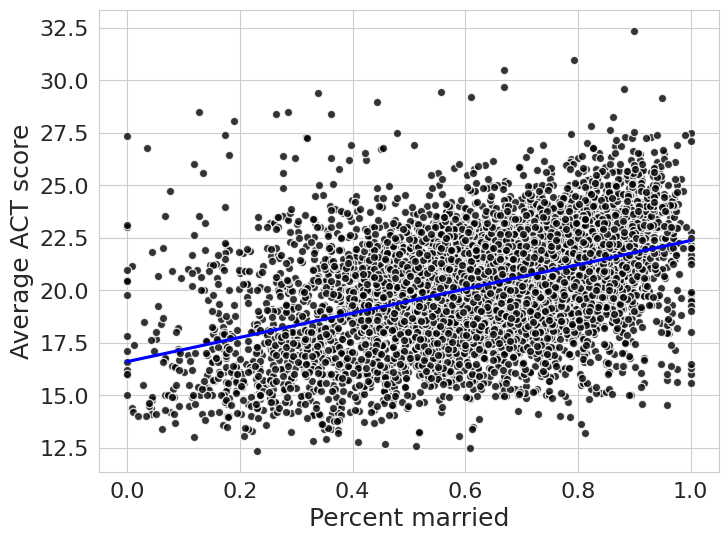

In [ ]:
plt.figure(figsize=(8,6))


sns.regplot(data=df,
            x='percent_married',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent married', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [ ]:
model_pm = smf.ols(formula='average_act ~ percent_married', data=df).fit()

In [ ]:
print(model_pm.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:52   Log-Likelihood:                -16124.
No. Observations:                7227   AIC:                         3.225e+04
Df Residuals:                    7225   BIC:                         3.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6046      0.093    1

The model is significant, but it is not great. The $R^2 = 0.20$, which is low.

#### Percent of students with free or reduced price lunch

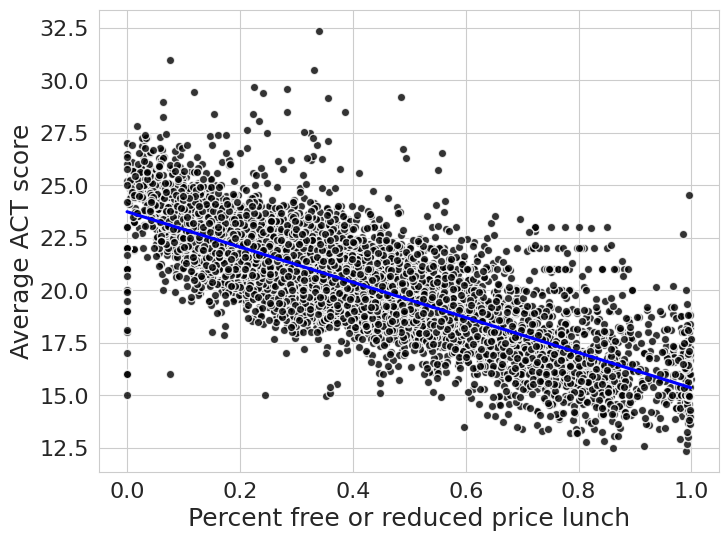

In [ ]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='percent_lunch',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent free or reduced price lunch', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

In [ ]:
model_pl = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()

print(model_pl.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

There is a strong negative linear relationship between the percent of students with free or reduced price lunch and the average ACT score ($R^2 = 0.61$).

<pre>
























</pre>

# Multiple linear regression

Fit the multiple linear regression model using all socioeconomic variables as predictors.

In [ ]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
    data=df).fit()

<pre>
























</pre>

##### Print the summary

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

<pre>
























</pre>

##### Use a residual plot for graphical assessment of model fit

In [ ]:
y_hat = model.predict()

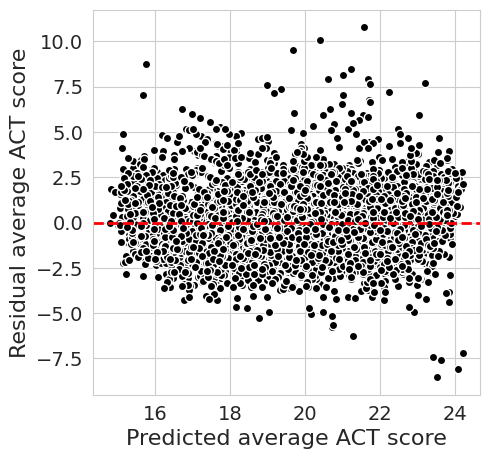

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788886207

<pre>
























</pre>

## Summary

1. The multiple linear regression model with all socioeconomic predictors can predict ACT scores with an average error of roughly 1 point using these predictors.

2. The residual plot suggests that there will be limited improvement from adding transformations of these predictors.

3. Not all predictors have significant coefficients.

4. Adding predictors to the model may improve the performance.

<pre>
























</pre>

# Fit a reduced model with the significant predictors

In [ ]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch',
    data=df).fit()

<pre>
























</pre>

##### Print the summary

In [ ]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:23:53   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

<pre>
























</pre>

##### Use a residual plot for graphical assessment of model fit

In [ ]:
y_hat = model_reduced.predict()

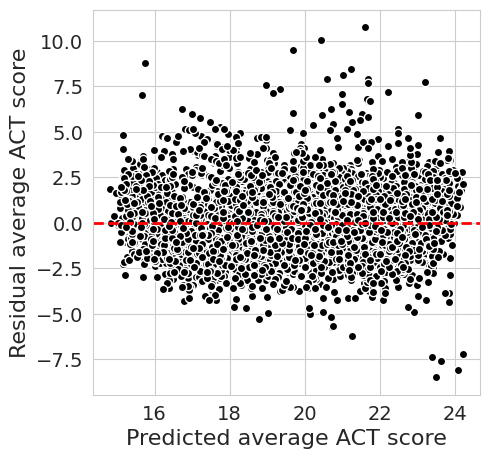

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1454832950346354

<pre>
























</pre>

##### Compare the accuracy between full and reduced models

In [ ]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
              index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1455     0.6279

<pre>
























</pre>

##### Use an ANOVA to test the significance of difference between models

In [ ]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7223.0  16916.619167      0.0       NaN       NaN       NaN
1    7221.0  16915.612457      2.0  1.006711  0.214874  0.806648

<pre>
























</pre>

## Summary

1. The model predicting the average ACT score from `rate_unemployment`, `percent_college` and, `percent_lunch` is not significantly different than the model with all five socioeconomic variables as predictors.

2. Adding predictors to the model may improve the performance.

3. We have not yet determined the relative importance of each predictor in the model.

<pre>
























</pre>

# Add charter school status as a predictor

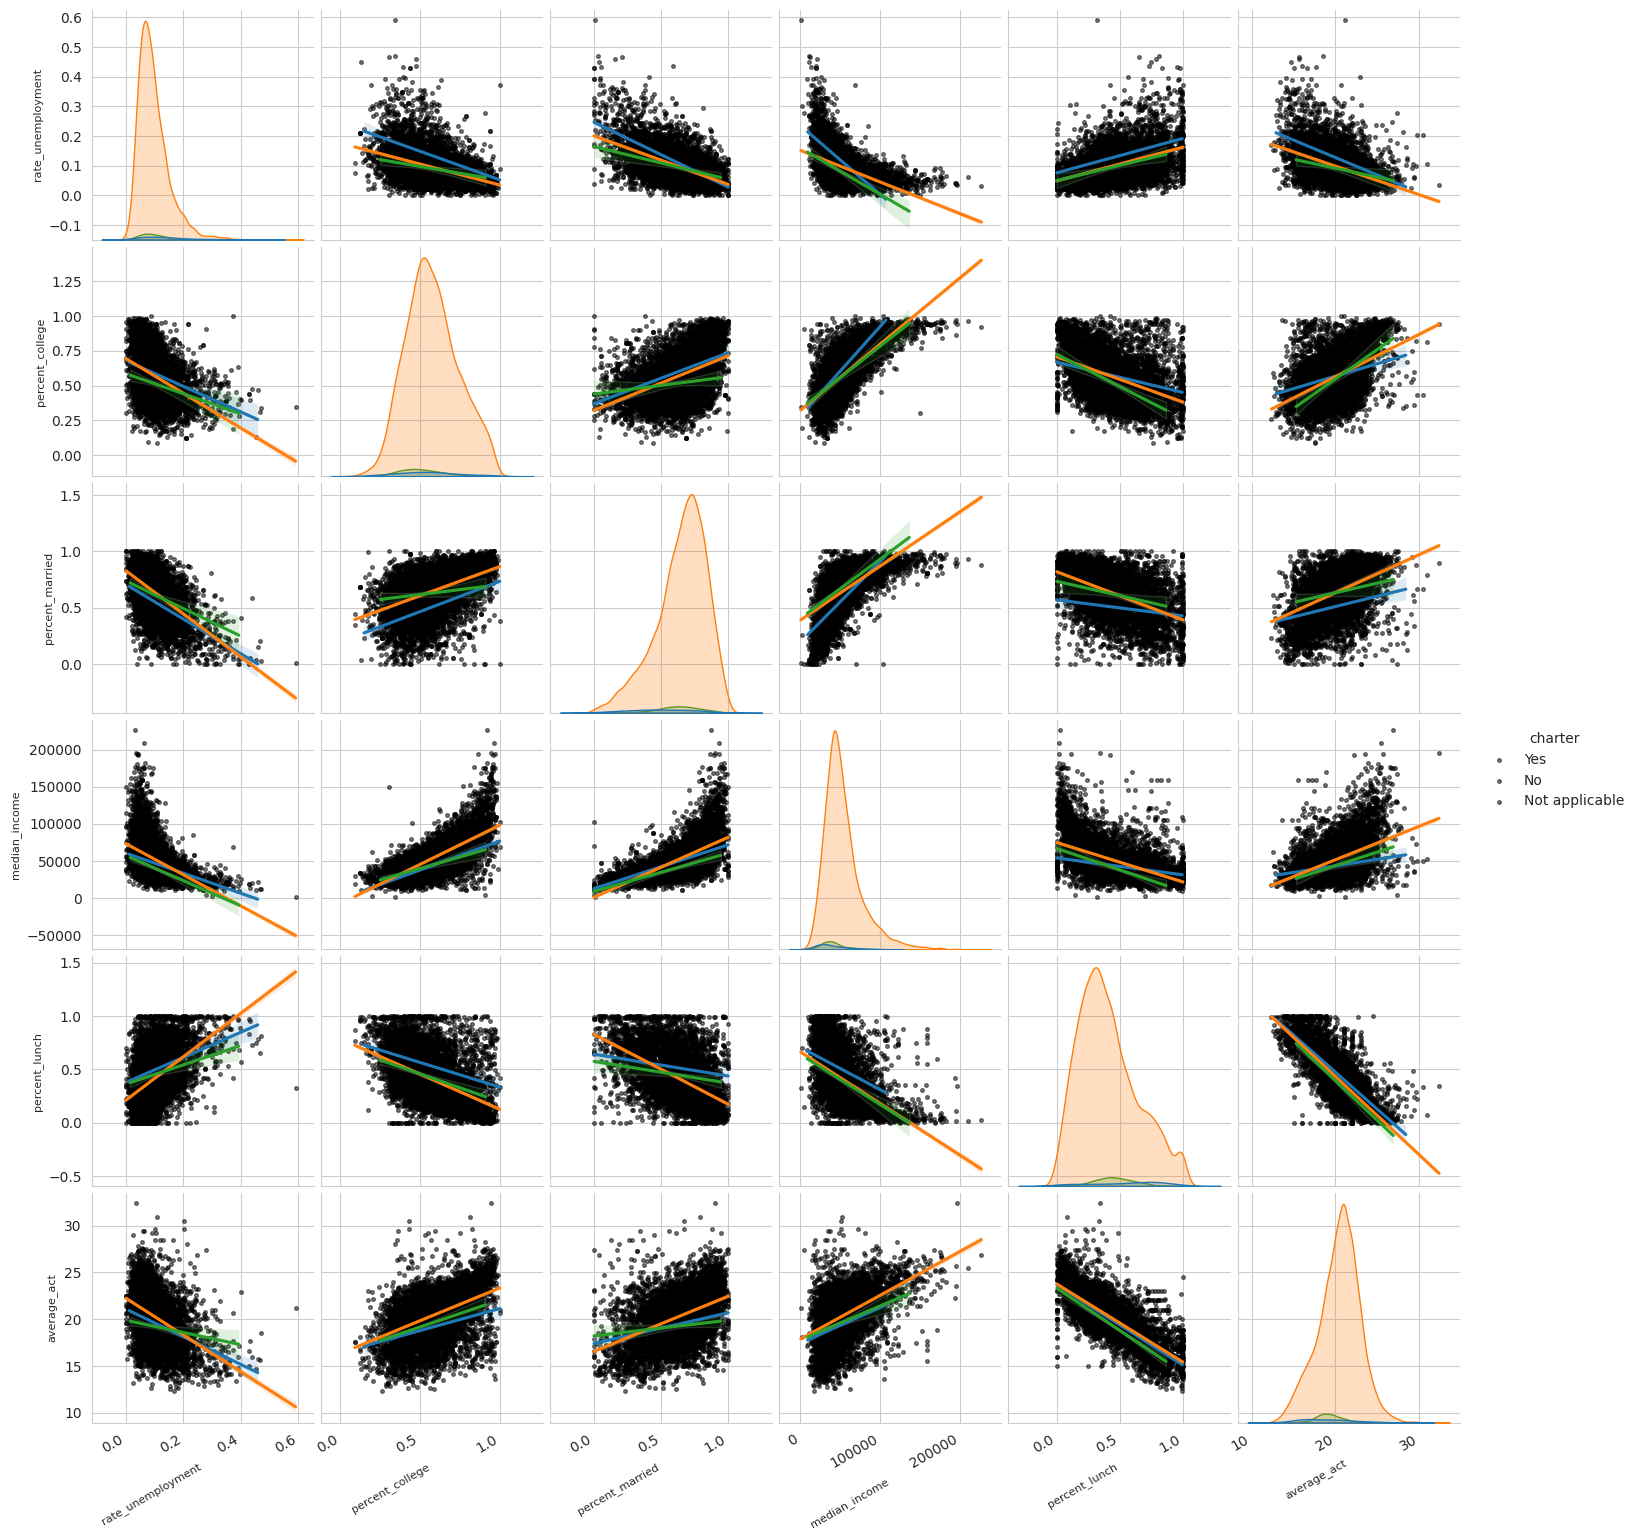

In [ ]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

Create a model where the intercept can vary between schools based on charter school status

In [ ]:
model_charter = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + C(charter)',
    data=df).fit()

<pre>
























</pre>

##### Print the summary

In [ ]:
print(model_charter.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2459.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:24:24   Log-Likelihood:                -13308.
No. Observations:                7227   AIC:                         2.663e+04
Df Residuals:                    7221   BIC:                         2.667e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

<pre>
























</pre>

##### Use a residual plot for graphical assessment of model fit

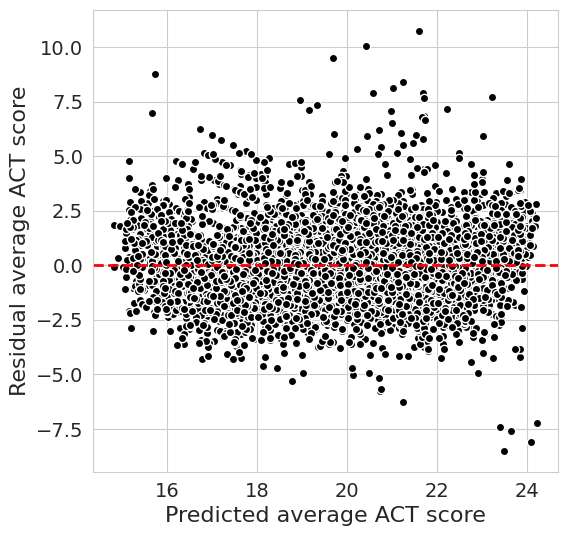

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_charter.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_charter.predict())

1.1404114515708637

<pre>
























</pre>

##### Create a model where the intercept and slope can vary between schools based on charter school status

In [ ]:
model_charter2 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)', data=df).fit()

<pre>
























</pre>

##### Print the summary

In [ ]:
print(model_charter2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1120.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:24:24   Log-Likelihood:                -13301.
No. Observations:                7227   AIC:                         2.663e+04
Df Residuals:                    7215   BIC:                         2.671e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

<pre>
























</pre>

##### Use a residual plot for graphical assessment of model fit

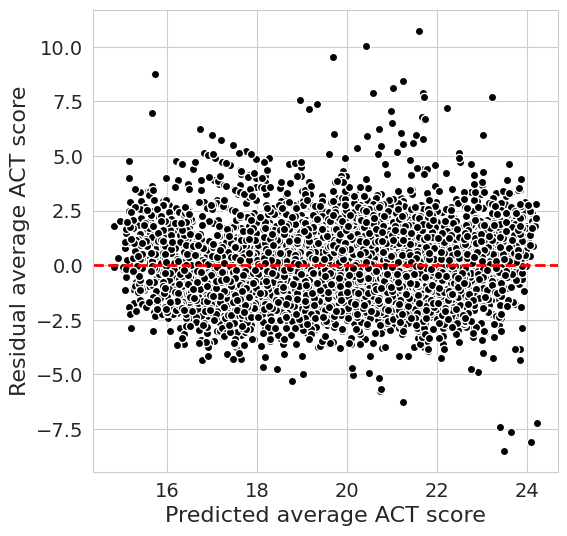

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_charter2.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

<pre>
























</pre>

##### Use an ANOVA to test the significance of difference between models

In [ ]:
anova_lm(model_charter, model_charter2)

df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0    7221.0  16821.669533      0.0        NaN       NaN       NaN
1    7215.0  16789.186717      6.0  32.482816  2.326532  0.030205

<pre>
























</pre>

##### Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_charter2.predict())

1.139733428612022

Compare to the intercept model

In [ ]:
mean_absolute_error(df['average_act'], model_charter.predict())

1.1404114515708637

<pre>
























</pre>

## Try a limited model using predictors with significant coefficients

##### Create a design matrix with all precitors

In [ ]:
from patsy import dmatrices

In [ ]:
y, X_design = dmatrices('average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)',
                        data=df,
                        return_type='dataframe'
                        )

In [ ]:
X_design.head()

Intercept  C(charter)[T.Not applicable]  C(charter)[T.Yes]  \
0        1.0                           0.0                1.0   
1        1.0                           0.0                0.0   
2        1.0                           0.0                0.0   
3        1.0                           0.0                0.0   
4        1.0                           0.0                0.0   

   rate_unemployment  rate_unemployment:C(charter)[T.Not applicable]  \
0           0.117962                                             0.0   
1           0.063984                                             0.0   
2           0.056460                                             0.0   
3           0.044739                                             0.0   
4           0.077014                                             0.0   

   rate_unemployment:C(charter)[T.Yes]  percent_college  \
0                             0.117962         0.445283   
1                             0.000000         0.662765   
2                             0.000000         0.701864   
3                             0.000000         0.692062   
4                             0.000000         0.640060   

   percent_college:C(charter)[T.Not applicable]  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   percent_college:C(charter)[T.Yes]  percent_lunch  \
0                           0.445283       0.066901   
1                           0.000000       0.112412   
2                           0.000000       0.096816   
3                           0.000000       0.296960   
4                           0.000000       0.262641   

   percent_lunch:C(charter)[T.Not applicable]  percent_lunch:C(charter)[T.Yes]  
0                                         0.0                         0.066901  
1                                         0.0                         0.000000  
2                                         0.0                         0.000000  
3                                         0.0                         0.000000  
4                                         0.0                         0.000000

<pre>
























</pre>

##### Keep only significant predictors from the full model

In [ ]:
X = X_design.loc[:, model_charter2.pvalues<0.05]

print(X.columns)

Index(['Intercept', 'C(charter)[T.Yes]', 'rate_unemployment',
       'rate_unemployment:C(charter)[T.Yes]', 'percent_college',
       'percent_college:C(charter)[T.Yes]', 'percent_lunch'],
      dtype='object')


<pre>
























</pre>

##### Fit the model

In [ ]:
model_charter3 = sm.OLS(y, X).fit()

<pre>
























</pre>

##### Print the summary

In [ ]:
print(model_charter3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2036.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:24:25   Log-Likelihood:                -13322.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7220   BIC:                         2.671e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

<pre>
























</pre>

##### Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_charter3.predict())

1.1451732954719023

In [ ]:
mean_absolute_error(df['average_act'], model_charter2.predict())

1.139733428612022

In [ ]:
mean_absolute_error(df['average_act'], model_charter.predict())

1.1404114515708637

<pre>
























</pre>

## Summary

1. Whether a school is a charter school or not can have a statistically significant, but practically small impact on the model.

<pre>
























</pre>

While a scaling transformation is not required for multiple linear regression models, scaling helps us to interpret the relative importance of each predictor based on the magnitude of the estimated coefficients.

# Scaling

##### Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame

In [ ]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [ ]:
scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [ ]:
scaler = StandardScaler().fit(df[predictor_variables])

In [ ]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

<pre>
























</pre>

##### Check the mean and standard deviation of the transformed data.

In [ ]:
df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                       0.0  
std                        1.0

<pre>
























</pre>

##### Fit the multiple linear regression model with the normalized predictors

In [ ]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df).fit()

<pre>
























</pre>

##### Print the summary

In [ ]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:24:25   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

<pre>
























</pre>

##### Compare the accuracy between the original and normalized models

In [ ]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
              index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               1.1455     0.6279
reduced model                  1.1455     0.6279

<pre>
























</pre>

## Summary

1. The percent of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis.

<pre>
























</pre>

# Conclusion

The analysis shows that college entrance test scores (ACT and SAT) are related to socioeconomic variables.

In particular, using only the percent of students at a school receiving free or reduced price lunch, we can predict ACT scores to within a single point, on average.

The percent of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis. It was also the only variable measured for students at the school, rather than for the neighborhood. It is an open question how important the other predictors would be if they were measured for the students at the school, rather than for the neighborhood.

